# Basic NLP

In [1]:
#TF-IDF sklearn
import string
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import nltk
from nltk import Text
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
data = pd.read_csv("data/q_ethereum_merge_reddit_full10.csv", index_col="time")

In [3]:
# Simple methods to analyze text
tokens = []
for text in data.text:
    tokens.extend(word_tokenize(text))
data_tokens = Text(tokens)
# Collocations
data_tokens.collocations()
# Concordance "Merge"
data_tokens.concordance("Merge",width=100)

smart contracts; transaction fees; smart contract; Rocket Pool; data
shards; market cap; gas fees; scaling solutions; data availability;
Elon Musk; long term; consensus mechanism; Beacon Chain; Frequently
Asked; years ago; Asked Questions; Useful Links; beacon chain; per
second; ETH 2.0
Displaying 25 of 1972 matches:
the fastest growing staking protocol since the merge ( [ https : //twitter.com/StakerReport/status/
bs/status/1595131075499790336 ) ) Now that the Merge is firmly behind us , and that we 're deep in 
even after its recent tweaks . '' Indeed , the Merge upgrade , which switched the platform to the e
 down in the 2018 cycle . * The effects of The Merge + EIP-1559 have helped the ETH price . * * Che
y opinion , the discovered facts are enough to merge the addresses into a cluster . Which addresses
dresses into a cluster . Which addresses do we merge : Target address 0x864875aef79B107221bEE89C8ff
 decentralized financial market because it can merge and utilize all existing cry

In [4]:
lemmatizer = WordNetLemmatizer()
data = data[~data['text'].isin(['[removed]', '[deleted]']).dropna()]
pp_data = ""

for text in data['text']:
    text = text.lower()
    text = ''.join(ch for ch in text if ch not in string.punctuation)
    tokens = word_tokenize(text)
    lemmas = ' '.join([lemmatizer.lemmatize(token) for token in tokens])
    pp_data += lemmas

pp_data = [pp_data]

In [5]:
#TF-IDF using Scikit learn
vectorizer = TfidfVectorizer(max_df=1, min_df=0.5, decode_error='ignore', stop_words='english',smooth_idf=True,use_idf=True)
vector = vectorizer.fit_transform(pp_data)
#vector.toarray()[0]

In [6]:
# place tf-idf values in a DataFrame
df_tfidf = pd.DataFrame(vector.T.todense(), index=vectorizer.get_feature_names(), columns=["tfidf"])
df_tfidf.sort_values(by=["tfidf"],ascending=False)[:50]

,tfidf
ethereum,0.379019
eth,0.273948
ha,0.217078
merge,0.169137
like,0.153446
transaction,0.152579
bitcoin,0.129952
network,0.127525
chain,0.125444
fee,0.124317


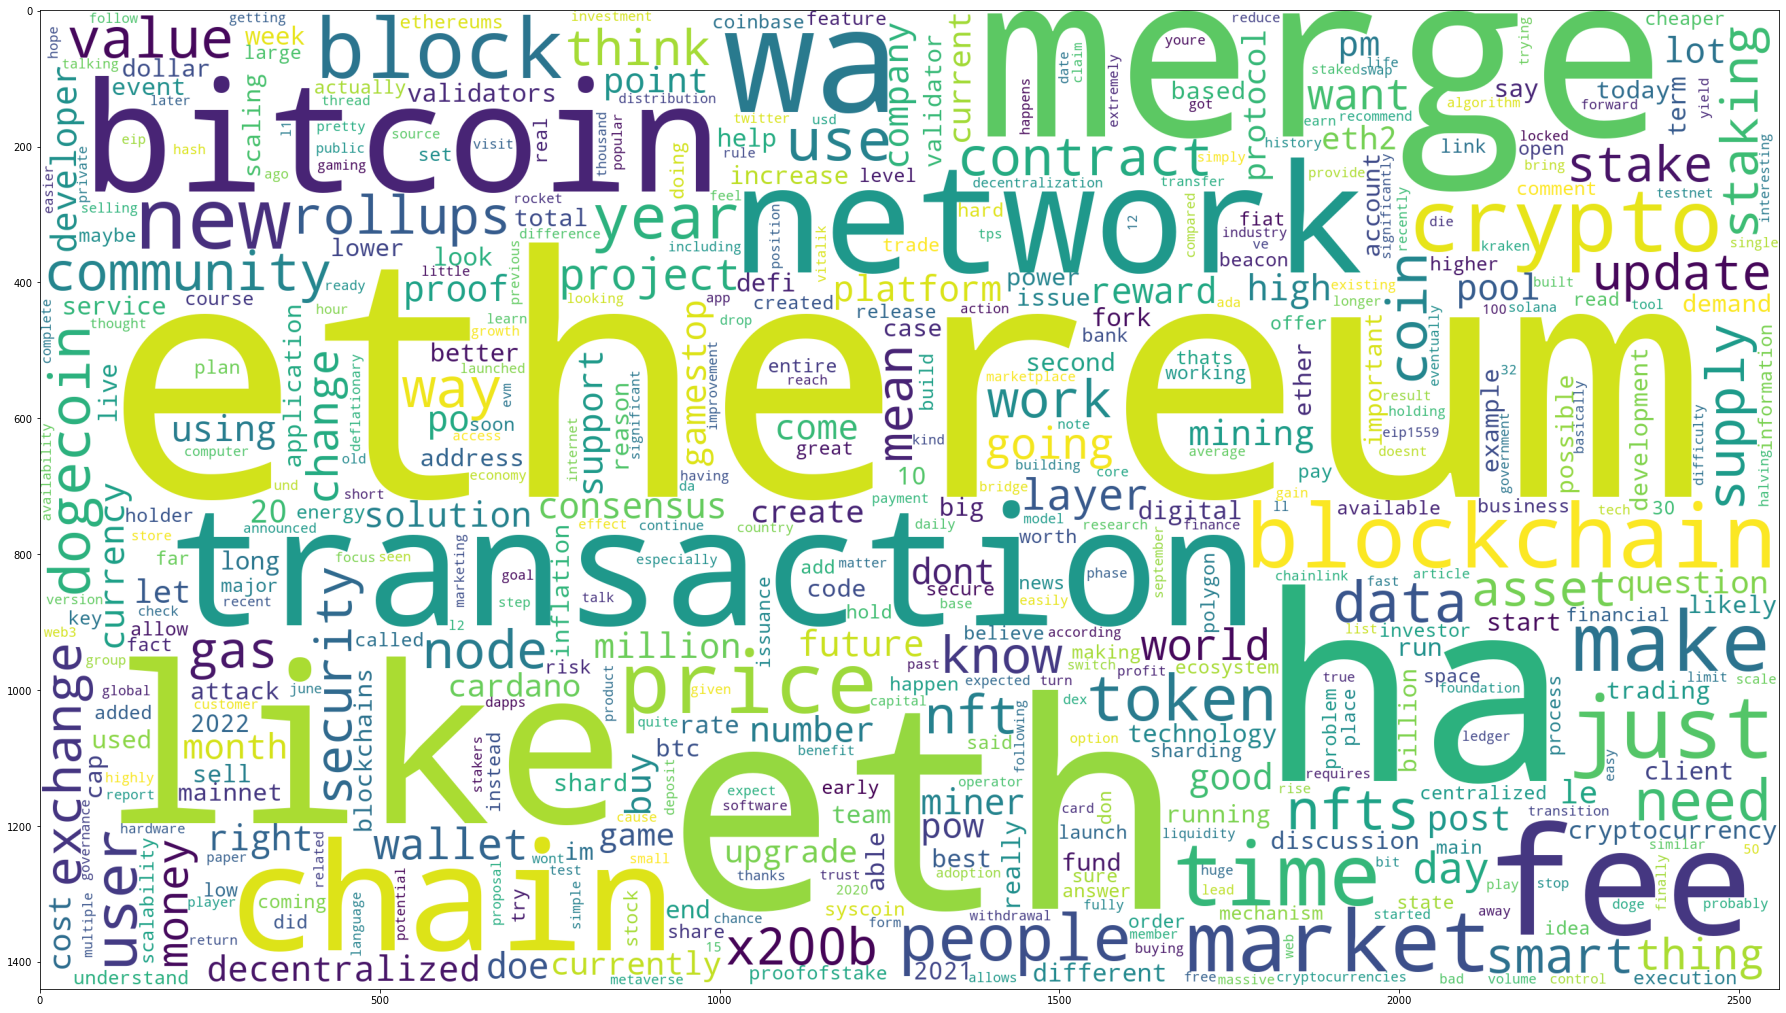

In [15]:
w = WordCloud(width=2560,height=1440,mode='RGBA',background_color='white',max_words=500).fit_words(df_tfidf.tfidf)
plt.figure(figsize=(32,18))
plt.imshow(w)
plt.savefig('wordcloud.png')